# Regression with all variables

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [7]:
ABY = []
ABY_train = []
ABY_test = []

coef = []
std = []
pval = []
fpr = []
tpr = []

TPs = []
FPs = []
TNs = []
FNs = []

TPs_A0 = []
FPs_A0 = []
TNs_A0 = []
FNs_A0 = []

TPs_A1 = []
FPs_A1 = []
TNs_A1 = []
FNs_A1 = []

TPs_B0 = []
FPs_B0 = []
TNs_B0 = []
FNs_B0 = []

TPs_B1 = []
FPs_B1 = []
TNs_B1 = []
FNs_B1 = []

TPs_A0B0 = []
FPs_A0B0 = []
TNs_A0B0 = []
FNs_A0B0 = []

TPs_A1B0 = []
FPs_A1B0 = []
TNs_A1B0 = []
FNs_A1B0 = []

TPs_A0B1 = []
FPs_A0B1 = []
TNs_A0B1 = []
FNs_A0B1 = []

TPs_A1B1 = []
FPs_A1B1 = []
TNs_A1B1 = []
FNs_A1B1 = []

In [8]:
for i in range(1):
    data = pd.read_csv('synthetic_data_v2010_' + str(i) + '.csv')
    x_train, x_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data['Y'], test_size=0.2)
    ABY.append(data.groupby(['A','B','Y']).count()['X1']/data.shape[0]*100)
    ABY_train.append(pd.concat((x_train, y_train), axis=1).groupby(['A','B','Y']).count()['X1']/x_train.shape[0]*100)
    ABY_test.append(pd.concat((x_test, y_test), axis=1).groupby(['A','B','Y']).count()['X1']/x_test.shape[0]*100)
    x_train = sm.add_constant(x_train)
    x_test = sm.add_constant(x_test)
    mod = sm.GLM(y_train, x_train, family=sm.genmod.families.family.Binomial())
    res = mod.fit()
    std.append(res.bse)
    coef.append(res.params)
    pval.append(res.pvalues)
    data_pred = data.loc[x_test.index, :]
    data_pred['Y_pred'] = list(map(round, res.predict(x_test)))
    data_pred['Y_pred proba'] = res.predict(x_test)
    fpr.append(metrics.roc_curve(data_pred['Y'], data_pred['Y_pred proba'])[0])
    tpr.append(metrics.roc_curve(data_pred['Y'], data_pred['Y_pred proba'])[1])
    FPs.append(metrics.confusion_matrix(data_pred['Y'], data_pred['Y_pred'])[1, 0])
    FNs.append(metrics.confusion_matrix(data_pred['Y'], data_pred['Y_pred'])[0, 1])
    TPs.append(metrics.confusion_matrix(data_pred['Y'], data_pred['Y_pred'])[0, 0])
    TNs.append(metrics.confusion_matrix(data_pred['Y'], data_pred['Y_pred'])[1, 1])
    # A=0
    FPs_A0.append(metrics.confusion_matrix(data_pred[data_pred['A']<=0]['Y'], data_pred[data_pred['A']<=0]['Y_pred'])[1, 0])
    FNs_A0.append(metrics.confusion_matrix(data_pred[data_pred['A']<=0]['Y'], data_pred[data_pred['A']<=0]['Y_pred'])[0, 1])
    TPs_A0.append(metrics.confusion_matrix(data_pred[data_pred['A']<=0]['Y'], data_pred[data_pred['A']<=0]['Y_pred'])[0, 0])
    TNs_A0.append(metrics.confusion_matrix(data_pred[data_pred['A']<=0]['Y'], data_pred[data_pred['A']<=0]['Y_pred'])[1, 1])
    # A=1
    FPs_A1.append(metrics.confusion_matrix(data_pred[data_pred['A']>0]['Y'], data_pred[data_pred['A']>0]['Y_pred'])[1, 0])
    FNs_A1.append(metrics.confusion_matrix(data_pred[data_pred['A']>0]['Y'], data_pred[data_pred['A']>0]['Y_pred'])[0, 1])
    TPs_A1.append(metrics.confusion_matrix(data_pred[data_pred['A']>0]['Y'], data_pred[data_pred['A']>0]['Y_pred'])[0, 0])
    TNs_A1.append(metrics.confusion_matrix(data_pred[data_pred['A']>0]['Y'], data_pred[data_pred['A']>0]['Y_pred'])[1, 1])
    # B=0
    FPs_B0.append(metrics.confusion_matrix(data_pred[data_pred['B']<=0]['Y'], data_pred[data_pred['B']<=0]['Y_pred'])[1, 0])
    FNs_B0.append(metrics.confusion_matrix(data_pred[data_pred['B']<=0]['Y'], data_pred[data_pred['B']<=0]['Y_pred'])[0, 1])
    TPs_B0.append(metrics.confusion_matrix(data_pred[data_pred['B']<=0]['Y'], data_pred[data_pred['B']<=0]['Y_pred'])[0, 0])
    TNs_B0.append(metrics.confusion_matrix(data_pred[data_pred['B']<=0]['Y'], data_pred[data_pred['B']<=0]['Y_pred'])[1, 1])
    # B=1
    FPs_B1.append(metrics.confusion_matrix(data_pred[data_pred['B']>0]['Y'], data_pred[data_pred['B']>0]['Y_pred'])[1, 0])
    FNs_B1.append(metrics.confusion_matrix(data_pred[data_pred['B']>0]['Y'], data_pred[data_pred['B']>0]['Y_pred'])[0, 1])
    TPs_B1.append(metrics.confusion_matrix(data_pred[data_pred['B']>0]['Y'], data_pred[data_pred['B']>0]['Y_pred'])[0, 0])
    TNs_B1.append(metrics.confusion_matrix(data_pred[data_pred['B']>0]['Y'], data_pred[data_pred['B']>0]['Y_pred'])[1, 1])
    # A=0,B=0
    FPs_A0B0.append(metrics.confusion_matrix(data_pred[(data_pred['A']<=0)&(data_pred['B']<=0)]['Y'], data_pred[(data_pred['A']<=0)&(data_pred['B']<=0)]['Y_pred'])[1, 0])
    FNs_A0B0.append(metrics.confusion_matrix(data_pred[(data_pred['A']<=0)&(data_pred['B']<=0)]['Y'], data_pred[(data_pred['A']<=0)&(data_pred['B']<=0)]['Y_pred'])[0, 1])
    TPs_A0B0.append(metrics.confusion_matrix(data_pred[(data_pred['A']<=0)&(data_pred['B']<=0)]['Y'], data_pred[(data_pred['A']<=0)&(data_pred['B']<=0)]['Y_pred'])[0, 0])
    TNs_A0B0.append(metrics.confusion_matrix(data_pred[(data_pred['A']<=0)&(data_pred['B']<=0)]['Y'], data_pred[(data_pred['A']<=0)&(data_pred['B']<=0)]['Y_pred'])[1, 1])
    # A=1,B=0
    FPs_A1B0.append(metrics.confusion_matrix(data_pred[(data_pred['A']>0)&(data_pred['B']<=0)]['Y'], data_pred[(data_pred['A']>0)&(data_pred['B']<=0)]['Y_pred'])[1, 0])
    FNs_A1B0.append(metrics.confusion_matrix(data_pred[(data_pred['A']>0)&(data_pred['B']<=0)]['Y'], data_pred[(data_pred['A']>0)&(data_pred['B']<=0)]['Y_pred'])[0, 1])
    TPs_A1B0.append(metrics.confusion_matrix(data_pred[(data_pred['A']>0)&(data_pred['B']<=0)]['Y'], data_pred[(data_pred['A']>0)&(data_pred['B']<=0)]['Y_pred'])[0, 0])
    TNs_A1B0.append(metrics.confusion_matrix(data_pred[(data_pred['A']>0)&(data_pred['B']<=0)]['Y'], data_pred[(data_pred['A']>0)&(data_pred['B']<=0)]['Y_pred'])[1, 1])
    # A=0,B=1
    FPs_A0B1.append(metrics.confusion_matrix(data_pred[(data_pred['A']<=0)&(data_pred['B']>0)]['Y'], data_pred[(data_pred['A']<=0)&(data_pred['B']>0)]['Y_pred'])[1, 0])
    FNs_A0B1.append(metrics.confusion_matrix(data_pred[(data_pred['A']<=0)&(data_pred['B']>0)]['Y'], data_pred[(data_pred['A']<=0)&(data_pred['B']>0)]['Y_pred'])[0, 1])
    TPs_A0B1.append(metrics.confusion_matrix(data_pred[(data_pred['A']<=0)&(data_pred['B']>0)]['Y'], data_pred[(data_pred['A']<=0)&(data_pred['B']>0)]['Y_pred'])[0, 0])
    TNs_A0B1.append(metrics.confusion_matrix(data_pred[(data_pred['A']<=0)&(data_pred['B']>0)]['Y'], data_pred[(data_pred['A']<=0)&(data_pred['B']>0)]['Y_pred'])[1, 1])
    # A=1,B=1
    FPs_A1B1.append(metrics.confusion_matrix(data_pred[(data_pred['A']>0)&(data_pred['B']>0)]['Y'], data_pred[(data_pred['A']>0)&(data_pred['B']>0)]['Y_pred'])[1, 0])
    FNs_A1B1.append(metrics.confusion_matrix(data_pred[(data_pred['A']>0)&(data_pred['B']>0)]['Y'], data_pred[(data_pred['A']>0)&(data_pred['B']>0)]['Y_pred'])[0, 1])
    TPs_A1B1.append(metrics.confusion_matrix(data_pred[(data_pred['A']>0)&(data_pred['B']>0)]['Y'], data_pred[(data_pred['A']>0)&(data_pred['B']>0)]['Y_pred'])[0, 0])
    TNs_A1B1.append(metrics.confusion_matrix(data_pred[(data_pred['A']>0)&(data_pred['B']>0)]['Y'], data_pred[(data_pred['A']>0)&(data_pred['B']>0)]['Y_pred'])[1, 1])
    print(i)

0


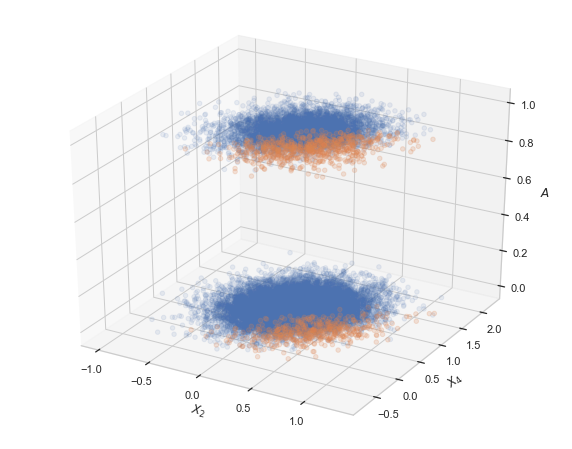

In [9]:
sns.set(style = "whitegrid")

fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(projection='3d')

ax.scatter(data_pred[data_pred['Y_pred']==0]['X2'], data_pred[data_pred['Y_pred']==0]['X4'], data_pred[data_pred['Y_pred']==0]['A'], alpha=0.1)
ax.scatter(data_pred[data_pred['Y_pred']==1]['X2'], data_pred[data_pred['Y_pred']==1]['X4'], data_pred[data_pred['Y_pred']==1]['A'], alpha=0.2)
ax.set_xlabel('$X_2$')
ax.set_ylabel('$X_4$')
ax.set_zlabel('$A$')
# plt.legend(['$\hat{Y}=0$', '$\hat{Y}=1$'])
# plt.savefig('3Dplot_X2X4AYpred_allvar.png')
plt.show()

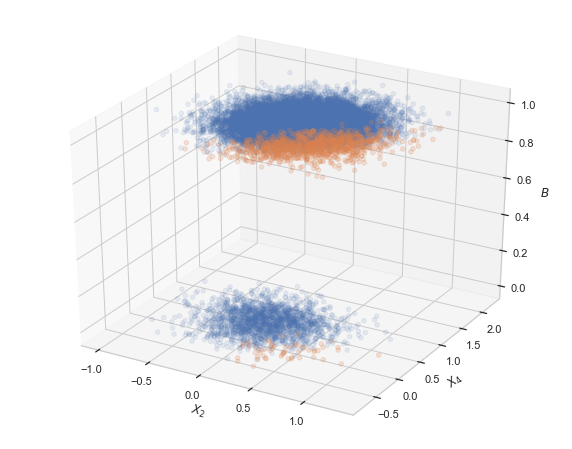

In [10]:
sns.set(style = "whitegrid")

fig = plt.figure(figsize=[10,8])
ax = fig.add_subplot(projection='3d')

ax.scatter(data_pred[data_pred['Y_pred']==0]['X2'], data_pred[data_pred['Y_pred']==0]['X4'], data_pred[data_pred['Y_pred']==0]['B'], alpha=0.1)
ax.scatter(data_pred[data_pred['Y_pred']==1]['X2'], data_pred[data_pred['Y_pred']==1]['X4'], data_pred[data_pred['Y_pred']==1]['B'], alpha=0.2)
ax.set_xlabel('$X_2$')
ax.set_ylabel('$X_4$')
ax.set_zlabel('$B$')
# plt.legend(['$\hat{Y}=0$', '$\hat{Y}=1$'])
# plt.savefig('3Dplot_X2X4BYpred_allvar.png')
plt.show()

## Number of observations in the train sets

In [140]:
np.mean(ABY, axis=0), 1.96*np.std(ABY, axis=0, ddof=1)/10

(array([ 6589.33,  1011.62, 51459.03, 10942.24,  1894.97,   523.38,
        20067.16,  7512.27]),
 array([0.01714169, 0.00615987, 0.03452757, 0.02101404, 0.00871586,
        0.00418131, 0.02549387, 0.01460552]))

In [143]:
np.mean(ABY_train, axis=0)*x_train.shape[0]/100, 1.96*np.std(ABY_train, axis=0, ddof=1)/10*x_train.shape[0]/100

(array([ 5277.33,   811.09, 41160.61,  8755.97,  1515.77,   418.79,
        16050.9 ,  6009.54]),
 array([14.91682685,  5.48022343, 29.46851219, 17.84652583,  7.50782343,
         3.75479865, 21.2173915 , 13.02739041]))

In [137]:
np.mean(ABY_test, axis=0), 1.96*np.std(ABY_test, axis=0, ddof=1)/10

(array([ 6.56   ,  1.00265, 51.4921 , 10.93135,  1.896  ,  0.52295,
        20.0813 ,  7.51365]),
 array([0.03372543, 0.01304843, 0.07140042, 0.0451361 , 0.01929522,
        0.01000678, 0.05364691, 0.03628925]))

### Metrics computation

In [54]:
ACCs = [(TPs[i]+TNs[i])/(TPs[i]+FPs[i]+FNs[i]+TNs[i]) for i in range(100)]

ARs = [(TPs[i]+FPs[i])/(TPs[i]+FPs[i]+FNs[i]+TNs[i]) for i in range(100)]
ARs_A0 = [(TPs_A0[i]+FPs_A0[i])/(TPs_A0[i]+FPs_A0[i]+FNs_A0[i]+TNs_A0[i]) for i in range(100)]
ARs_A1 = [(TPs_A1[i]+FPs_A1[i])/(TPs_A1[i]+FPs_A1[i]+FNs_A1[i]+TNs_A1[i]) for i in range(100)]
ARs_B0 = [(TPs_B0[i]+FPs_B0[i])/(TPs_B0[i]+FPs_B0[i]+FNs_B0[i]+TNs_B0[i]) for i in range(100)]
ARs_B1 = [(TPs_B1[i]+FPs_B1[i])/(TPs_B1[i]+FPs_B1[i]+FNs_B1[i]+TNs_B1[i]) for i in range(100)]
ARs_A0B0 = [(TPs_A0B0[i]+FPs_A0B0[i])/(TPs_A0B0[i]+FPs_A0B0[i]+FNs_A0B0[i]+TNs_A0B0[i]) for i in range(100)]
ARs_A1B0 = [(TPs_A1B0[i]+FPs_A1B0[i])/(TPs_A1B0[i]+FPs_A1B0[i]+FNs_A1B0[i]+TNs_A1B0[i]) for i in range(100)]
ARs_A0B1 = [(TPs_A0B1[i]+FPs_A0B1[i])/(TPs_A0B1[i]+FPs_A0B1[i]+FNs_A0B1[i]+TNs_A0B1[i]) for i in range(100)]
ARs_A1B1 = [(TPs_A1B1[i]+FPs_A1B1[i])/(TPs_A1B1[i]+FPs_A1B1[i]+FNs_A1B1[i]+TNs_A1B1[i]) for i in range(100)]

TPRs = [TPs[i]/(TPs[i]+FNs[i]) for i in range(100)]
TPRs_A0 = [TPs_A0[i]/(TPs_A0[i]+FNs_A0[i]) for i in range(100)]
TPRs_A1 = [TPs_A1[i]/(TPs_A1[i]+FNs_A1[i]) for i in range(100)]
TPRs_B0 = [TPs_B0[i]/(TPs_B0[i]+FNs_B0[i]) for i in range(100)]
TPRs_B1 = [TPs_B1[i]/(TPs_B1[i]+FNs_B1[i]) for i in range(100)]
TPRs_A0B0 = [TPs_A0B0[i]/(TPs_A0B0[i]+FNs_A0B0[i]) for i in range(100)]
TPRs_A1B0 = [TPs_A1B0[i]/(TPs_A1B0[i]+FNs_A1B0[i]) for i in range(100)]
TPRs_A0B1 = [TPs_A0B1[i]/(TPs_A0B1[i]+FNs_A0B1[i]) for i in range(100)]
TPRs_A1B1 = [TPs_A1B1[i]/(TPs_A1B1[i]+FNs_A1B1[i]) for i in range(100)]

FPRs = [FPs[i]/(FPs[i]+TNs[i]) for i in range(100)]
FPRs_A0 = [FPs_A0[i]/(FPs_A0[i]+TNs_A0[i]) for i in range(100)]
FPRs_A1 = [FPs_A1[i]/(FPs_A1[i]+TNs_A1[i]) for i in range(100)]
FPRs_B0 = [FPs_B0[i]/(FPs_B0[i]+TNs_B0[i]) for i in range(100)]
FPRs_B1 = [FPs_B1[i]/(FPs_B1[i]+TNs_B1[i]) for i in range(100)]
FPRs_A0B0 = [FPs_A0B0[i]/(FPs_A0B0[i]+TNs_A0B0[i]) for i in range(100)]
FPRs_A1B0 = [FPs_A1B0[i]/(FPs_A1B0[i]+TNs_A1B0[i]) for i in range(100)]
FPRs_A0B1 = [FPs_A0B1[i]/(FPs_A0B1[i]+TNs_A0B1[i]) for i in range(100)]
FPRs_A1B1 = [FPs_A1B1[i]/(FPs_A1B1[i]+TNs_A1B1[i]) for i in range(100)]

### Regression weights

In [14]:
np.mean(coef, axis=0)

array([-1.82488474,  0.54616574,  2.81436194,  0.2491992 , -2.52740778,
       -0.16553932,  0.41335065])

In [16]:
1.96*np.std(coef, ddof=1, axis=0)/10

array([0.01014558, 0.00416293, 0.01045974, 0.00157077, 0.00665056,
       0.00508832, 0.00739051])

In [17]:
np.mean(std, axis=0), 1.96*np.std(std, axis=0, ddof=1)/10

(array([0.05001252, 0.02099442, 0.05311358, 0.00718322, 0.03270798,
        0.025047  , 0.03978407]),
 array([6.15229179e-05, 1.90557810e-05, 4.79014916e-05, 6.19075992e-06,
        3.33657686e-05, 1.87443545e-05, 6.24752068e-05]))

In [18]:
np.mean(pval, axis=0), 1.96*np.std(pval, ddof=1, axis=0)/10

(array([5.21342514e-262, 9.26428370e-126, 0.00000000e+000, 3.31030313e-229,
        0.00000000e+000, 7.85244335e-007, 6.72159803e-019]),
 array([0.00000000e+000, 1.42932899e-125, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.06465992e-006, 8.36400628e-019]))

In [19]:
# plt.bar([i for i in range(7)], [np.mean(b0s), np.mean(b1s), np.mean(b2s), np.mean(b3s), np.mean(b4s), np.mean(bas), np.mean(bbs)])
# plt.xticks([i for i in range(7)], ['Intercept'] + list(x_train.columns))
# plt.ylim([-2.7,1.4])
# plt.ylabel('Regression weights')
# plt.savefig('weights_allvariables_v0909.png')

### Global confusion matrix

In [22]:
np.mean(TPs), np.mean(FNs), np.mean(FPs), np.mean(TNs)

(15519.14, 483.02, 3305.98, 691.86)

In [23]:
1.96*np.std(TPs, ddof=1)/10, 1.96*np.std(FNs, ddof=1)/10, 1.96*np.std(FPs, ddof=1)/10, 1.96*np.std(TNs, ddof=1)/10

(11.806894366950322, 5.646016619733158, 10.38738288237468, 6.07296695884576)

### Accuracy

In [24]:
np.mean(ACCs)

(0.8105499999999999,
 0.8341844983648072,
 0.75529000505173,
 0.8498248308145301,
 0.8061843124415939)

In [25]:
1.96*np.std(ACCs, ddof=1)/10*100

(0.05455360007193004,
 0.06423080135587592,
 0.10677269728901731,
 0.1699221784000525,
 0.05878451120992701)

### Acceptance rates

In [66]:
np.mean(ARs), np.mean(ARs_A0), np.mean(ARs_A1), np.mean(ARs_B0), np.mean(ARs_B1)

(0.9414860000000002,
 0.9661285839072246,
 0.8838928120250458,
 0.9732777205818608,
 0.9379388762049092)

In [33]:
1.96*np.std(ARs, ddof=1)/10*100, 1.96*np.std(ARs_A0, ddof=1)/10*100, 1.96*np.std(ARs_A1, ddof=1)/10*100, 1.96*np.std(ARs_B0, ddof=1)/10*100, 1.96*np.std(ARs_B1, ddof=1)/10*100

(0.04893408382547268,
 0.04283807244176096,
 0.10494374929277567,
 0.08670676653359198,
 0.05258418585431691)

In [65]:
# np.mean(ARs_A0B0), 1.96*np.std(ARs_A0B0, ddof=1)/10*100
# np.mean(ARs_A1B0), 1.96*np.std(ARs_A1B0, ddof=1)/10*100
# np.mean(ARs_A0B1), 1.96*np.std(ARs_A0B1, ddof=1)/10*100
# np.mean(ARs_A1B1), 1.96*np.std(ARs_A1B1, ddof=1)/10*100

(0.8792331031009766, 0.11858203742373277)

### TPR

In [56]:
np.mean(TPRs), np.mean(TPRs_A0), np.mean(TPRs_A1), np.mean(TPRs_B0), np.mean(TPRs_B1)

(0.9701521183455557,
 0.9827198809462794,
 0.9368497414475246,
 0.9862630877207672,
 0.9682374880246195,
 0.9921367808194935,
 0.965769076783804,
 0.9815119256152168,
 0.9341172998815945)

In [29]:
1.96*np.std(TPRs, ddof=1)/10*100, 1.96*np.std(TPRs_A0, ddof=1)/10*100, 1.96*np.std(TPRs_A1, ddof=1)/10*100, 1.96*np.std(TPRs_B0, ddof=1)/10*100, 1.96*np.std(TPRs_B1, ddof=1)/10*100

(0.035432317389560694,
 0.02862249622004836,
 0.08728851966716414,
 0.06232021014007334,
 0.03828785264240356)

In [70]:
# np.mean(TPRs_A0B0), 1.96*np.std(TPRs_A0B0, ddof=1)/10*100
# np.mean(TPRs_A1B0), 1.96*np.std(TPRs_A1B0, ddof=1)/10*100
# np.mean(TPRs_A0B1), 1.96*np.std(TPRs_A0B1, ddof=1)/10*100
np.mean(TPRs_A1B1), 1.96*np.std(TPRs_A1B1, ddof=1)/10*100

(0.9341172998815945, 0.09077216818060188)

### FPR

In [57]:
np.mean(FPRs), np.mean(FPRs_A0), np.mean(FPRs_A1), np.mean(FPRs_B0), np.mean(FPRs_B1), np.mean(FPRs_A0B0), np.mean(FPRs_A1B0), np.mean(FPRs_A0B1), np.mean(FPRs_A1B1)

(0.8268733424681011,
 0.8855327118455034,
 0.7397438870441684,
 0.9015173504215391,
 0.8206579425045217,
 0.9364537943946654,
 0.8314906658707214,
 0.8807793172111922,
 0.7334168840266666)

In [37]:
1.96*np.std(FPRs, ddof=1)/10*100, 1.96*np.std(FPRs_A0, ddof=1)/10*100, 1.96*np.std(FPRs_A1, ddof=1)/10*100, 1.96*np.std(FPRs_B0, ddof=1)/10*100, 1.96*np.std(FPRs_B1, ddof=1)/10*100

(0.1472310717555031,
 0.15344461880521082,
 0.23985481949740975,
 0.3896797853531006,
 0.15664728924220467)

In [74]:
# np.mean(FPRs_A0B0), 1.96*np.std(FPRs_A0B0, ddof=1)/10*100
# np.mean(FPRs_A1B0), 1.96*np.std(FPRs_A1B0, ddof=1)/10*100
# np.mean(FPRs_A0B1), 1.96*np.std(FPRs_A0B1, ddof=1)/10*100
np.mean(FPRs_A1B1), 1.96*np.std(FPRs_A1B1, ddof=1)/10*100

(0.7334168840266666, 0.2617691786868082)

### Fairness definitions

In [38]:
np.mean(np.array(ARs_A0)-np.array(ARs_A1)), 1.96*np.std(np.array(ARs_A0)-np.array(ARs_A1), ddof=1)/10*100, np.mean(np.array(ARs_B0)-np.array(ARs_B1)), 1.96*np.std(np.array(ARs_B0)-np.array(ARs_B1), ddof=1)/10*100

(0.0825957450909189,
 0.10328953258622046,
 0.03466148812120487,
 0.09716678544733398)

In [40]:
np.mean(np.array(TPRs_A0)-np.array(TPRs_A1)), 1.96*np.std(np.array(TPRs_A0)-np.array(TPRs_A1), ddof=1)/10*100, np.mean(np.array(TPRs_B0)-np.array(TPRs_B1)), 1.96*np.std(np.array(TPRs_B0)-np.array(TPRs_B1), ddof=1)/10*100

(0.04664085056060428,
 0.08561353779833933,
 0.01831648980799836,
 0.07006624327810766)

In [39]:
np.mean(np.array(FPRs_A0)-np.array(FPRs_A1)), 1.96*np.std(np.array(FPRs_A0)-np.array(FPRs_A1), ddof=1)/10*100, np.mean(np.array(FPRs_B0)-np.array(FPRs_B1)), 1.96*np.std(np.array(FPRs_B0)-np.array(FPRs_B1), ddof=1)/10*100

(0.14601931803939236,
 0.2596064946143517,
 0.07615705462167999,
 0.422689875581817)

### ROC

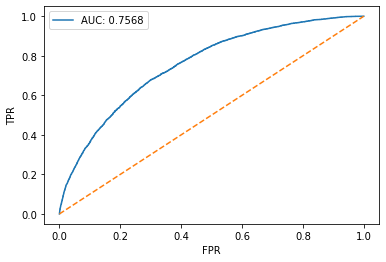

In [51]:
plt.plot(fpr[-1], tpr[-1], label='AUC: ' + str(np.round(metrics.roc_auc_score(data_pred['Y'], data_pred['Y_pred proba']), 4)))
plt.plot([0, 1], [0, 1], linestyle='dashed')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
# plt.savefig('ROC_sim_allvar_v2710.png')